In [2]:
#meta 7/2/2019
# Imbalanced Datasets
# refer to Medium article

#dataset from Kaggle: creditcardfraud

# Working with Imbalanced Datasets
and how to handle them.  

Source: Will Badr, article Having an Imbalanced Dataset?  Here Is How You Can Fix It.

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sn

## Dataset

Source: kaggle  
https://www.kaggle.com/mlg-ulb/creditcardfraud

Context  
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Content  
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Inspiration  
Identify fraudulent credit card transactions.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

### 0. Load Data

In [4]:
df = pd.read_csv('myData/creditcard.csv')
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 0.1.  EDA

#### 0.1.1 Class Distribution

0    284315
1       492
Name: Class, dtype: int64


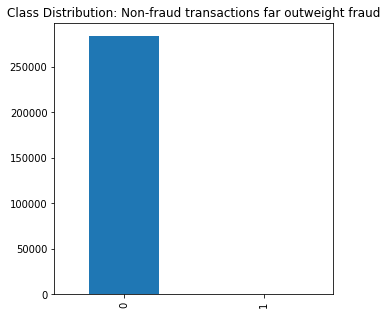

In [24]:
print(df['Class'].value_counts())
df['Class'].value_counts().plot.bar(title= 'Class Distribution: Non-fraud transactions far outweight fraud', figsize=(5,5))

### 1. Resampling

#### 1.1. Undersamping
Randomly delete some observations from the majority class.

In [21]:
#shuffle dataset
df_shuffled = df.sample(frac=1, random_state=4)
print(df_shuffled.shape)

#fraud dataset
df_fraud = df_shuffled.loc[df_shuffled['Class']==1]
print(df_fraud.shape)

#randomly select 492 non-fraud observations
df_non_fraud = df_shuffled.loc[df_shuffled['Class']==0].sample(n=492, random_state=42)
print(df_non_fraud.shape)

#concatenate both dataframes
df_undersampled = pd.concat([df_fraud, df_non_fraud])
print(df_undersampled.shape)
df_undersampled.head()

(284807, 31)
(492, 31)
(492, 31)
(984, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
9179,13126.0,-2.880042,5.225442,-11.063330,6.689951,-5.759924,-2.244031,-11.199975,4.014722,-3.429304,...,2.002883,0.351102,0.795255,-0.778379,-1.646815,0.487539,1.427713,0.583172,1.00,1
223618,143456.0,-2.006582,3.676577,-5.463811,7.232058,-1.627859,-0.996755,-4.299833,2.268867,-3.651067,...,0.713907,-0.063868,0.167947,-0.449864,0.023702,0.536905,0.485864,-0.042393,1.00,1
9487,14073.0,-4.153014,8.204797,-15.031714,10.330100,-3.994426,-3.250013,-10.415698,4.620804,-5.711248,...,1.976988,0.256510,0.485908,-1.198821,-0.526567,0.634874,1.627209,0.723235,1.00,1
10497,17220.0,1.189784,0.942289,0.082334,3.024050,0.412406,-0.214415,0.053558,-0.110353,0.883798,...,-0.502636,-1.047398,-0.056752,-0.340688,0.541235,-0.098300,-0.003041,0.049819,3.79,1
250761,155054.0,-0.512349,4.827060,-7.973939,7.334059,0.367704,-2.055129,-2.935856,1.431008,-4.544722,...,0.535620,-0.459496,-0.009364,-1.140436,-0.006445,0.527970,0.558881,0.126517,0.77,1


1    492
0    492
Name: Class, dtype: int64


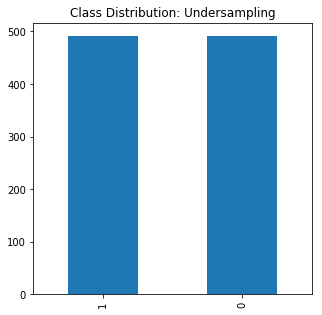

In [23]:
print(df_undersampled['Class'].value_counts())
df_undersampled['Class'].value_counts().plot.bar(title= 'Class Distribution: Undersampling', figsize=(5,5))

#### 1.2 Visualize Features Before Resampling

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

corr = df.corr()
sn.heatmap(corr, cmap='YlGnBu', ax=ax)
ax.set_title('Imbalanced Correlation Matrix', fontsize=14)

### 2. Balance